In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tarfile

file_path = "/content/drive/MyDrive/Indonesia AI - Project 2 : Text Summarization/liputan6_data.tar.gz"
extract_path = "/content/liputan6_data"

with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

print("Done extracting.")


Done extracting.


In [3]:
import os

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


Streaming output truncated to the last 5000 lines.
/content/liputan6_data/liputan6_data/xtreme/test/18639.json
/content/liputan6_data/liputan6_data/xtreme/test/14206.json
/content/liputan6_data/liputan6_data/xtreme/test/25983.json
/content/liputan6_data/liputan6_data/xtreme/test/25109.json
/content/liputan6_data/liputan6_data/xtreme/test/23600.json
/content/liputan6_data/liputan6_data/xtreme/test/19497.json
/content/liputan6_data/liputan6_data/xtreme/test/24410.json
/content/liputan6_data/liputan6_data/xtreme/test/22328.json
/content/liputan6_data/liputan6_data/xtreme/test/17233.json
/content/liputan6_data/liputan6_data/xtreme/test/18884.json
/content/liputan6_data/liputan6_data/xtreme/test/15342.json
/content/liputan6_data/liputan6_data/xtreme/test/23735.json
/content/liputan6_data/liputan6_data/xtreme/test/17920.json
/content/liputan6_data/liputan6_data/xtreme/test/24149.json
/content/liputan6_data/liputan6_data/xtreme/test/16947.json
/content/liputan6_data/liputan6_data/xtreme/test/

In [4]:
base_path = "/content/liputan6_data/liputan6_data"

In [5]:
train_files = "/content/liputan6_data/liputan6_data/canonical/train"
test_files = "/content/liputan6_data/liputan6_data/canonical/test"
dev_files = "/content/liputan6_data/liputan6_data/canonical/dev"

In [6]:
import os
import json
import pandas as pd

# Path folder
train_dir = "/content/liputan6_data/liputan6_data/canonical/train"
dev_dir = "/content/liputan6_data/liputan6_data/canonical/dev"
test_dir = "/content/liputan6_data/liputan6_data/canonical/test"

def load_selected_fields(directory, split_name):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            try:
                with open(file_path, 'r') as file:
                    json_data = json.load(file)
                    data.append({
                        "id": json_data.get("id", ""),
                        "url": json_data.get("url", ""),
                        "clean_article": json.dumps(json_data.get("clean_article", []), ensure_ascii=False),
                        "clean_summary": json.dumps(json_data.get("clean_summary", []), ensure_ascii=False),
                        "extractive_summary": json.dumps(json_data.get("extractive_summary", []), ensure_ascii=False),
                        "split": split_name
                    })
            except Exception as e:
                print(f"Gagal membaca file: {file_path} - {e}")
    return data

# Load masing-masing data
train_data = load_selected_fields(train_dir, "train")
dev_data = load_selected_fields(dev_dir, "dev")
test_data = load_selected_fields(test_dir, "test")

# Simpan ke tiga file CSV terpisah
pd.DataFrame(train_data).to_csv("liputan6_train.csv", index=False)
pd.DataFrame(dev_data).to_csv("liputan6_dev.csv", index=False)
pd.DataFrame(test_data).to_csv("liputan6_test.csv", index=False)

print("✅ CSV 'liputan6_train.csv', 'liputan6_dev.csv', dan 'liputan6_test.csv' berhasil dibuat.")


✅ CSV 'liputan6_train.csv', 'liputan6_dev.csv', dan 'liputan6_test.csv' berhasil dibuat.


In [7]:
import pandas as pd
data_train = pd.read_csv("liputan6_train.csv")
data_test = pd.read_csv("liputan6_test.csv")
data_dev = pd.read_csv("liputan6_dev.csv")

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  193883 non-null  int64 
 1   url                 193883 non-null  object
 2   clean_article       193883 non-null  object
 3   clean_summary       193883 non-null  object
 4   extractive_summary  193883 non-null  object
 5   split               193883 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.9+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10972 non-null  int64 
 1   url                 10972 non-null  object
 2   clean_article       10972 non-null  object
 3   clean_summary       10972 non-null  object
 4   extractive_summary  10972 non-null  object
 5   split               10972 non-null  object
dtypes: int64(1), object(5)
memory usage: 514.4+ KB


In [10]:
data_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10972 non-null  int64 
 1   url                 10972 non-null  object
 2   clean_article       10972 non-null  object
 3   clean_summary       10972 non-null  object
 4   extractive_summary  10972 non-null  object
 5   split               10972 non-null  object
dtypes: int64(1), object(5)
memory usage: 514.4+ KB


In [ ]:

# Mengambil 20000 baris pertama dari setiap DataFrame
data_train2 = data_train.head(10000)
data_test2 = data_test.head(2000)
data_dev2 = data_dev.head(2000)

print("Informasi data_train_subset (5000 baris):")
data_train2.info()

print("\nInformasi data_test_subset (1000 baris):")
data_test2.info()

print("\nInformasi data_dev_subset (1000 baris):")
data_dev2.info()

# Sekarang Anda dapat menggunakan data_train_subset, data_test_subset, dan data_dev_subset
# untuk analisis atau pemrosesan selanjutnya, yang masing-masing hanya berisi 20000 baris.

Informasi data_train_subset (5000 baris):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10000 non-null  int64 
 1   url                 10000 non-null  object
 2   clean_article       10000 non-null  object
 3   clean_summary       10000 non-null  object
 4   extractive_summary  10000 non-null  object
 5   split               10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB

Informasi data_test_subset (1000 baris):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   int64 
 1   url                 2000 non-null   object
 2   clean_article       2000 non-null   object
 3   clean_summary       20

In [12]:
data_train2 = data_train2.drop(columns=['id','url', 'extractive_summary', 'split'])
data_test2 = data_test2.drop(columns=['id','url', 'extractive_summary', 'split'])
data_dev2 = data_dev2.drop(columns=['id','url', 'extractive_summary', 'split'])

In [12]:
import pandas as pd

# Gabungkan list of token menjadi string
data_train2['article'] = data_train2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
data_train2['summary'] = data_train2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))

# Gabungkan list of token menjadi string
data_test2['article'] = data_test2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
data_test2['summary'] = data_test2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))

# Gabungkan list of token menjadi string
data_dev2['article'] = data_dev2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
data_dev2['summary'] = data_dev2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))


/tmp/ipython-input-12-1429244308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train2['article'] = data_train2['clean_article'].apply(lambda x: ' '.join(eval(x)[0]))
/tmp/ipython-input-12-1429244308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train2['summary'] = data_train2['clean_summary'].apply(lambda x: ' '.join(eval(x)[0]))
/tmp/ipython-input-12-1429244308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [13]:
data_train2

,id,url,clean_article,clean_summary,extractive_summary,split,article,summary
0,193008,https://www.liputan6.com/news/read/193008/gali...,"[[""Liputan6"", ""."", ""com"", "","", ""Bogor"", "":"", ""...","[[""Empat"", ""orang"", ""warga"", ""Jonggol"", "","", ""...","[1, 5]",train,"Liputan6 . com , Bogor : Sedikitnya empat oran...","Empat orang warga Jonggol , Bogor , malam tadi..."
1,256139,https://www.liputan6.com/news/read/256139/kelu...,"[[""Liputan6"", ""."", ""com"", "","", ""Kabul"", "":"", ""...","[[""Setelah"", ""video"", ""penawanan"", ""serdadu"", ...","[0, 18]",train,"Liputan6 . com , Kabul : Video penawanan serda...",Setelah video penawanan serdadu AS yang Jumat ...
2,280262,https://www.liputan6.com/news/read/280262/duka...,"[[""Liputan6"", ""."", ""com"", "","", ""Bima"", "":"", ""S...","[[""Sahni"", ""masih"", ""tak"", ""ikhlas"", ""melepas""...","[1, 4, 2]",train,"Liputan6 . com , Bima : Sahni masih berduka .",Sahni masih tak ikhlas melepas kepergian istri...
3,200115,https://www.liputan6.com/news/read/200115/amie...,"[[""Liputan6"", ""."", ""com"", "","", ""Yogyakarta"", ""...","[[""Ketua"", ""Majelis"", ""Pertimbangan"", ""Partai""...","[0, 2]",train,"Liputan6 . com , Yogyakarta : Ketua Majelis Pe...",Ketua Majelis Pertimbangan Partai DPP PAN Amie...
4,212567,https://www.liputan6.com/news/read/212567/crou...,"[[""Jika"", ""tidak"", ""ada"", ""aral"", ""melintang"",...","[[""Rencananya"", ""hari"", ""ini"", ""Portsmouth"", ""...","[10, 4, 5]",train,"Jika tidak ada aral melintang , hari Senin ( 7...",Rencananya hari ini Portsmouth resmi menggaet ...
...,...,...,...,...,...,...,...,...
9995,243669,https://www.liputan6.com/news/read/243669/warg...,"[[""Liputan6"", ""."", ""com"", "","", ""Medan"", "":"", ""...","[[""Ratusan"", ""aktivis"", ""peduli"", ""kehutanan"",...","[1, 6]",train,"Liputan6 . com , Medan : Ratusan orang dari be...",Ratusan aktivis peduli kehutanan Sumut mendesa...
9996,268034,https://www.liputan6.com/news/read/268034/bela...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Museum"", ""Listrik"", ""di"", ""Taman"", ""Mini"", ...","[2, 5]",train,"Liputan6 . com , Jakarta : Pada tahun ini , ta...","Museum Listrik di Taman Mini Indonesia Indah ,..."
9997,265691,https://www.liputan6.com/news/read/265691/utus...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Staf"", ""khusus"", ""Presiden"", "","", ""Velix"", ...","[2, 3]",train,"Liputan6 . com , Jakarta : Mendekati keputusan...","Staf khusus Presiden , Velix Wanggai dan Andi ..."
9998,29515,https://www.liputan6.com/news/read/29515/istri...,"[[""Liputan6"", ""."", ""com"", "","", ""Depok"", "":"", ""...","[[""Tersangka"", ""kasus"", ""pembunuhan"", ""Hakim"",...","[0, 3]",train,"Liputan6 . com , Depok : Istri almarhum Hakim ...",Tersangka kasus pembunuhan Hakim Agung Syafiud...


In [14]:
data_test2

,id,url,clean_article,clean_summary,extractive_summary,split,article,summary
0,15771,https://www.liputan6.com/news/read/15771/pengh...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Sejumlah"", ""bekas"", ""penghuni"", ""rumah"", ""k...","[4, 8]",test,"Liputan6 . com , Jakarta : Peledakan rumah kos...",Sejumlah bekas penghuni rumah kos di kawasan P...
1,17383,https://www.liputan6.com/news/read/17383/tagih...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Setelah"", ""kenaikan"", ""tarif"", ""dasar"", ""li...","[0, 3]",test,"Liputan6 . com , Jakarta : Tagihan listrik set...","Setelah kenaikan tarif dasar listrik , diperki..."
2,15572,https://www.liputan6.com/news/read/15572/diben...,"[[""Liputan6"", ""."", ""com"", "","", ""Medan"", "":"", ""...","[[""Ratusan"", ""massa"", ""elemen"", ""pemuda"", ""di""...","[1, 2]",test,"Liputan6 . com , Medan : Dukungan terhadap Wak...",Ratusan massa elemen pemuda di Medan mendeklar...
3,17529,https://www.liputan6.com/news/read/17529/bentr...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Dua"", ""narapidana"", ""asal"", ""Nigeria"", ""did...","[4, 6, 7]",test,"Liputan6 . com , Jakarta : Pelaksana Harian Ke...",Dua narapidana asal Nigeria diduga menjadi pem...
4,17230,https://www.liputan6.com/news/read/17230/wapre...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Belum"", ""dapat"", ""dipastikan"", ""Wapres"", ""H...","[0, 1]",test,"Liputan6 . com , Jakarta : Wakil Presiden Hamz...",Belum dapat dipastikan Wapres Hamzah Haz mulai...
...,...,...,...,...,...,...,...,...
1995,24035,https://www.liputan6.com/news/read/24035/dua-s...,"[[""Liputan6"", ""."", ""com"", "","", ""Medan"", "":"", ""...","[[""Lantaran"", ""menyelewengkan"", ""solar"", ""dan""...","[1, 5]",test,"Liputan6 . com , Medan : Dua stasiun pengisian...",Lantaran menyelewengkan solar dan premium dua ...
1996,21842,https://www.liputan6.com/news/read/21842/beo-p...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Burung"", ""beo"", ""putih"", ""asal"", ""Kaltim"", ...","[3, 8]",test,"Liputan6 . com , Jakarta : Taman burung Taman ...",Burung beo putih asal Kaltim menambah koleksi ...
1997,14374,https://www.liputan6.com/news/read/14374/petin...,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Panglima"", ""Komando"", ""Cadangan"", ""Strategi...","[0, 3, 2]",test,"Liputan6 . com , Jakarta : Perwira Menengah da...",Panglima Komando Cadangan Strategis TNI Angkat...
1998,17119,https://www.liputan6.com/news/read/17119/jalur...,"[[""Liputan6"", ""."", ""com"", "","", ""Semarang"", "":""...","[[""Sehari"", ""setelah"", ""pelantikan"", ""Megawati...","[0, 5]",test,"Liputan6 . com , Semarang : Kepala Kepolisian ...",Sehari setelah pelantikan Megawati Sukarnoputr...


In [16]:
data_dev2

,clean_article,clean_summary,article,summary
0,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Pengendalian"", ""banjir"", ""di"", ""wilayah"", ""...","Liputan6 . com , Jakarta : Kepala Dinas Pekerj...",Pengendalian banjir di wilayah DKI Jakarta mas...
1,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Pengamat"", ""politik"", ""itu"", ""menyetujui"", ...","Liputan6 . com , Jakarta : Bekas Presiden Soeh...",Pengamat politik itu menyetujui agar Partai Go...
2,"[[""Liputan6"", ""."", ""com"", "","", ""Pontianak"", "":...","[[""Walikota"", ""Pontianak"", ""Buchori"", ""A"", ""Ra...","Liputan6 . com , Pontianak : Tak tahan melihat...",Walikota Pontianak Buchori A Rahman diminta mu...
3,"[[""Liputan6"", ""."", ""com"", "","", ""Semarang"", "":""...","[[""Kepolisian"", ""Kota"", ""Besar"", ""Semarang"", ""...","Liputan6 . com , Semarang : Sebanyak 58 orang ...","Kepolisian Kota Besar Semarang , Jawa Tengah ,..."
4,"[[""Liputan6"", ""."", ""com"", "","", ""Jakarta"", "":"",...","[[""Jakarta"", ""akan"", ""bebas"", ""bensin"", ""berti...","Liputan6 . com , Jakarta : Jakarta akan bebas ...",Jakarta akan bebas bensin bertimbel pada perte...
...,...,...,...,...
1995,"[[""Liputan6"", ""."", ""com"", "","", ""Jayapura"", "":""...","[[""Para"", ""pejuang"", ""yang"", ""ikut"", ""mempereb...","Liputan6 . com , Jayapura : Setelah menunggu s...",Para pejuang yang ikut memperebutkan Irianjaya...
1996,"[[""Liputan6"", ""."", ""com"", "","", ""Medan"", "":"", ""...","[[""Para"", ""transmigran"", ""asal"", ""Pulau"", ""Jaw...","Liputan6 . com , Medan : Ratusan transmigran t...",Para transmigran asal Pulau Jawa mengaku tak t...
1997,"[[""Liputan6"", ""."", ""com"", "","", ""Semarang"", "":""...","[[""Secara"", ""prinsip"", "","", ""Polri"", ""tak"", ""k...","Liputan6 . com , Semarang : Kepolisian RI akhi...","Secara prinsip , Polri tak keberatan jika Soew..."
1998,"[[""Liputan6"", ""."", ""com"", "","", ""Sangihe"", ""Tal...","[[""Barang"", ""ilegal"", ""asal"", ""Filipina"", ""mem...","Liputan6 . com , Sangihe Talaud : Sudah lazim ...",Barang ilegal asal Filipina memenuhi kawasan p...


In [15]:
data_train2 = data_train2.drop(columns=['clean_article', 'clean_summary'])
data_dev2 = data_dev2.drop(columns=['clean_article', 'clean_summary'])
data_test2 = data_test2.drop(columns=['clean_article', 'clean_summary'])

In [16]:
data_train2

,id,url,extractive_summary,split,article,summary
0,193008,https://www.liputan6.com/news/read/193008/gali...,"[1, 5]",train,"Liputan6 . com , Bogor : Sedikitnya empat oran...","Empat orang warga Jonggol , Bogor , malam tadi..."
1,256139,https://www.liputan6.com/news/read/256139/kelu...,"[0, 18]",train,"Liputan6 . com , Kabul : Video penawanan serda...",Setelah video penawanan serdadu AS yang Jumat ...
2,280262,https://www.liputan6.com/news/read/280262/duka...,"[1, 4, 2]",train,"Liputan6 . com , Bima : Sahni masih berduka .",Sahni masih tak ikhlas melepas kepergian istri...
3,200115,https://www.liputan6.com/news/read/200115/amie...,"[0, 2]",train,"Liputan6 . com , Yogyakarta : Ketua Majelis Pe...",Ketua Majelis Pertimbangan Partai DPP PAN Amie...
4,212567,https://www.liputan6.com/news/read/212567/crou...,"[10, 4, 5]",train,"Jika tidak ada aral melintang , hari Senin ( 7...",Rencananya hari ini Portsmouth resmi menggaet ...
...,...,...,...,...,...,...
9995,243669,https://www.liputan6.com/news/read/243669/warg...,"[1, 6]",train,"Liputan6 . com , Medan : Ratusan orang dari be...",Ratusan aktivis peduli kehutanan Sumut mendesa...
9996,268034,https://www.liputan6.com/news/read/268034/bela...,"[2, 5]",train,"Liputan6 . com , Jakarta : Pada tahun ini , ta...","Museum Listrik di Taman Mini Indonesia Indah ,..."
9997,265691,https://www.liputan6.com/news/read/265691/utus...,"[2, 3]",train,"Liputan6 . com , Jakarta : Mendekati keputusan...","Staf khusus Presiden , Velix Wanggai dan Andi ..."
9998,29515,https://www.liputan6.com/news/read/29515/istri...,"[0, 3]",train,"Liputan6 . com , Depok : Istri almarhum Hakim ...",Tersangka kasus pembunuhan Hakim Agung Syafiud...


In [17]:
data_dev2

,id,url,extractive_summary,split,article,summary
0,7916,https://www.liputan6.com/news/read/7916/pengen...,"[0, 10]",dev,"Liputan6 . com , Jakarta : Kepala Dinas Pekerj...",Pengendalian banjir di wilayah DKI Jakarta mas...
1,7742,https://www.liputan6.com/news/read/7742/arbi-s...,"[4, 6]",dev,"Liputan6 . com , Jakarta : Bekas Presiden Soeh...",Pengamat politik itu menyetujui agar Partai Go...
2,5114,https://www.liputan6.com/news/read/5114/kota-k...,"[1, 2]",dev,"Liputan6 . com , Pontianak : Tak tahan melihat...",Walikota Pontianak Buchori A Rahman diminta mu...
3,7085,https://www.liputan6.com/news/read/7085/lamara...,"[0, 2]",dev,"Liputan6 . com , Semarang : Sebanyak 58 orang ...","Kepolisian Kota Besar Semarang , Jawa Tengah ,..."
4,9099,https://www.liputan6.com/news/read/9099/perten...,"[0, 6, 1]",dev,"Liputan6 . com , Jakarta : Jakarta akan bebas ...",Jakarta akan bebas bensin bertimbel pada perte...
...,...,...,...,...,...,...
1995,3496,https://www.liputan6.com/news/read/3496/pejuan...,"[0, 3]",dev,"Liputan6 . com , Jayapura : Setelah menunggu s...",Para pejuang yang ikut memperebutkan Irianjaya...
1996,7466,https://www.liputan6.com/news/read/7466/transm...,"[1, 7]",dev,"Liputan6 . com , Medan : Ratusan transmigran t...",Para transmigran asal Pulau Jawa mengaku tak t...
1997,2780,https://www.liputan6.com/news/read/2780/kapolr...,"[3, 13]",dev,"Liputan6 . com , Semarang : Kepolisian RI akhi...","Secara prinsip , Polri tak keberatan jika Soew..."
1998,7379,https://www.liputan6.com/news/read/7379/sangih...,"[5, 11]",dev,"Liputan6 . com , Sangihe Talaud : Sudah lazim ...",Barang ilegal asal Filipina memenuhi kawasan p...


In [18]:
data_test2

,id,url,extractive_summary,split,article,summary
0,15771,https://www.liputan6.com/news/read/15771/pengh...,"[4, 8]",test,"Liputan6 . com , Jakarta : Peledakan rumah kos...",Sejumlah bekas penghuni rumah kos di kawasan P...
1,17383,https://www.liputan6.com/news/read/17383/tagih...,"[0, 3]",test,"Liputan6 . com , Jakarta : Tagihan listrik set...","Setelah kenaikan tarif dasar listrik , diperki..."
2,15572,https://www.liputan6.com/news/read/15572/diben...,"[1, 2]",test,"Liputan6 . com , Medan : Dukungan terhadap Wak...",Ratusan massa elemen pemuda di Medan mendeklar...
3,17529,https://www.liputan6.com/news/read/17529/bentr...,"[4, 6, 7]",test,"Liputan6 . com , Jakarta : Pelaksana Harian Ke...",Dua narapidana asal Nigeria diduga menjadi pem...
4,17230,https://www.liputan6.com/news/read/17230/wapre...,"[0, 1]",test,"Liputan6 . com , Jakarta : Wakil Presiden Hamz...",Belum dapat dipastikan Wapres Hamzah Haz mulai...
...,...,...,...,...,...,...
1995,24035,https://www.liputan6.com/news/read/24035/dua-s...,"[1, 5]",test,"Liputan6 . com , Medan : Dua stasiun pengisian...",Lantaran menyelewengkan solar dan premium dua ...
1996,21842,https://www.liputan6.com/news/read/21842/beo-p...,"[3, 8]",test,"Liputan6 . com , Jakarta : Taman burung Taman ...",Burung beo putih asal Kaltim menambah koleksi ...
1997,14374,https://www.liputan6.com/news/read/14374/petin...,"[0, 3, 2]",test,"Liputan6 . com , Jakarta : Perwira Menengah da...",Panglima Komando Cadangan Strategis TNI Angkat...
1998,17119,https://www.liputan6.com/news/read/17119/jalur...,"[0, 5]",test,"Liputan6 . com , Semarang : Kepala Kepolisian ...",Sehari setelah pelantikan Megawati Sukarnoputr...


In [19]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(data_train2[['article', 'summary']])
val_dataset = Dataset.from_pandas(data_dev2[['article', 'summary']])
test_dataset = Dataset.from_pandas(data_test2[['article', 'summary']])


In [20]:
train_dataset

Dataset({
    features: ['article', 'summary'],
    num_rows: 10000
})

In [21]:

import torch
# Define available device.
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.device(device)

device(type='cuda')

In [22]:
from transformers import BertTokenizer, EncoderDecoderModel
"""
Loading Tokenizer.
"""
tokenizer = BertTokenizer.from_pretrained("cahya/bert2bert-indonesian-summarization")
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token

"""
Loading Summarization Model.
"""
model = EncoderDecoderModel.from_pretrained("cahya/bert2bert-indonesian-summarization")
model = model.to(device) # Moving into GPU if available.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/999M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/999M [00:00<?, ?B/s]

In [23]:
def tokenize_function(example):
    inputs = tokenizer(example["article"], padding="max_length", truncation=True, max_length=512)
    targets = tokenizer(example["summary"], padding="max_length", truncation=True, max_length=128)

    inputs["labels"] = targets["input_ids"]
    return inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [24]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=df8dabbed380ceb3a4d1ff78885bbdc56ab40091c719ada35587957a077c7998
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [25]:
from datasets import load_metric
import numpy as np

rouge_metric = load_metric("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode prediksi dan label dari token ID ke string
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # ROUGE membutuhkan pemisahan kalimat (opsional tapi disarankan)
    decoded_preds = ["\n".join(pred.split(". ")) for pred in decoded_preds]
    decoded_labels = ["\n".join(label.split(". ")) for label in decoded_labels]

    result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    # Ambil skor F1-nya saja
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    return {k: round(v, 4) for k, v in result.items()}


/tmp/ipython-input-25-1573543906.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric("rouge")


In [30]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    # evaluation_strategy="no",
    save_strategy="no",
    logging_dir="/content/logs",
    logging_steps=1000,
    fp16=True,  # Mixed precision (hanya jika pakai GPU T4/V100/A100)
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)


trainer.train()



Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-30-753933343.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:557: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:577: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder model

Step,Training Loss
1000,0.481300
2000,0.387800
3000,0.292600
4000,0.228500


Step,Training Loss
1000,0.481300
2000,0.387800
3000,0.292600
4000,0.228500
5000,0.226500
6000,0.123400
7000,0.119900


TrainOutput(global_step=7500, training_loss=0.25610795237223305, metrics={'train_runtime': 2022.3866, 'train_samples_per_second': 14.834, 'train_steps_per_second': 3.708, 'total_flos': 1.840375922688e+16, 'train_loss': 0.25610795237223305, 'epoch': 3.0})

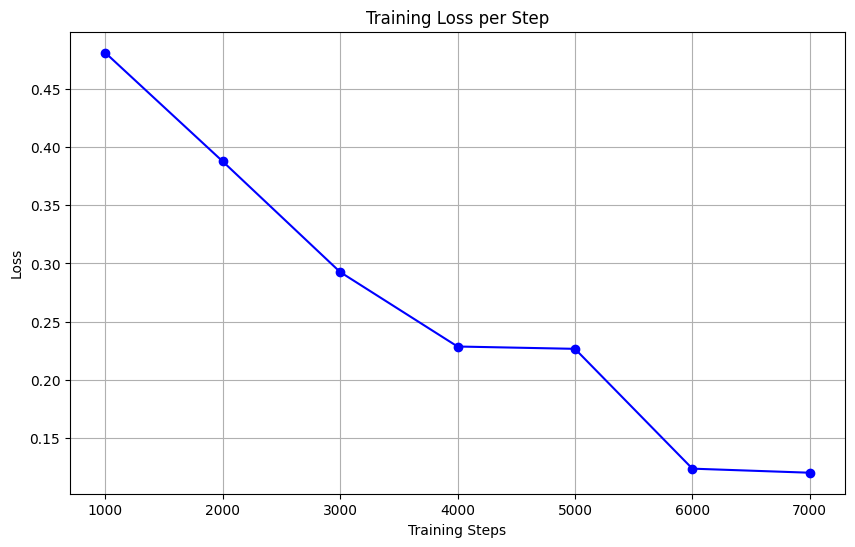

In [54]:
import matplotlib.pyplot as plt
train_losses = [entry for entry in trainer.state.log_history if 'loss' in entry]

# Extract langkah (step) dan nilai loss
steps = [entry['step'] for entry in train_losses]
losses = [entry['loss'] for entry in train_losses]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, marker='o', linestyle='-', color='b')
plt.title('Training Loss per Step')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.grid(True)
plt.show()



In [ ]:
# Tentukan path untuk menyimpan model di Google Drive
model_save_path = "/content/drive/MyDrive/Indonesia AI - Project 2 : Text Summarization/bert2bert_summarization_model"

# Simpan model
trainer.save_model(model_save_path)

print(f"Model berhasil disimpan di: {model_save_path}")



/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3465: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 40, 'min_length': 20, 'early_stopping': True, 'num_beams': 10, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Model berhasil disimpan di: /content/drive/MyDrive/Indonesia AI - Project 2 : Text Summarization/bert2bert_summarization_model


In [56]:
import evaluate

# Load metrik ROUGE
rouge_metric = evaluate.load("rouge")

# 1. Ambil 1000 data dari test set
test_dataset_subset = test_dataset.select(range(1000))

# 2. Tokenisasi (kalau belum)
test_dataset_subset = test_dataset_subset.map(tokenize_function, batched=True)

# 3. Fungsi untuk menghasilkan ringkasan
def generate_summary(batch):
    inputs = tokenizer(batch["article"], padding="max_length", truncation=True, max_length=512, return_tensors="pt").to(device)
    summary_ids = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=128,
        num_beams=4,
        early_stopping=True
    )
    batch["generated_summary"] = tokenizer.batch_decode(summary_ids, skip_special_tokens=True)
    return batch

# 4. Gunakan fungsi generate_summary
results = test_dataset_subset.map(generate_summary, batched=True, batch_size=4)

# 5. Ambil hasil ringkasan dan referensi
generated_summaries = results["generated_summary"]
reference_summaries = results["summary"]

# 6. (Opsional) Format dengan split kalimat
generated_formatted = ["\n".join(pred.strip().split(". ")) for pred in generated_summaries]
reference_formatted = ["\n".join(ref.strip().split(". ")) for ref in reference_summaries]

# 7. Hitung ROUGE
rouge_scores = rouge_metric.compute(
    predictions=generated_formatted,
    references=reference_formatted,
    use_stemmer=True
)

# 8. Tampilkan hasil dengan pembulatan
print("📊 Evaluasi ROUGE pada 1000 data test sample:")
for key in ["rouge1", "rouge2", "rougeL", "rougeLsum"]:
    score = round(rouge_scores[key] * 100, 2)
    print(f"{key}: {score}")


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

📊 Evaluasi ROUGE pada 1000 data test sample:
rouge1: 38.52
rouge2: 22.51
rougeL: 34.4
rougeLsum: 34.49


In [60]:
def buat_prediksi(teks_input, model, tokenizer, device):
    """
    Membuat prediksi ringkasan dari teks input menggunakan model yang sudah dilatih.

    Args:
        teks_input (str): Teks artikel yang ingin diringkas.
        model: Model Transformer (EncoderDecoderModel) yang sudah dilatih.
        tokenizer: Tokenizer yang sesuai dengan model.
        device: Perangkat komputasi ('cuda' atau 'cpu').

    Returns:
        str: Ringkasan hasil prediksi.
    """
    # Tokenisasi input
    inputs = tokenizer(teks_input, padding="max_length", truncation=True, max_length=512, return_tensors="pt").to(device)

    # Generate summary
    summary_ids = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=128,  # Sesuaikan dengan max_length target saat training
        num_beams=4,       # Jumlah beam untuk beam search
        early_stopping=True
    )

    # Decode hasil
    predicted_summary = tokenizer.batch_decode(summary_ids, skip_special_tokens=True)[0]

    return predicted_summary

# Contoh penggunaan:
# Asumsikan `model`, `tokenizer`, dan `device` sudah didefinisikan dari kode sebelumnya.
# `model` adalah model yang sudah dilatih.
# `tokenizer` adalah tokenizer yang digunakan saat training.
# `device` adalah perangkat ('cuda' atau 'cpu').

# Ambil contoh artikel dari dataset test (opsional, bisa diganti dengan teks lain)
contoh_artikel = test_dataset_subset[0]['article']
referensi_ringkasan = test_dataset_subset[0]['summary']

# Buat prediksi
ringkasan_prediksi = buat_prediksi(contoh_artikel, model, tokenizer, device)

print("Artikel Asli:")
print(contoh_artikel)
print("\nRingkasan Referensi:")
print(referensi_ringkasan)
print("\nRingkasan Hasil Prediksi:")
print(ringkasan_prediksi)

# Anda bisa mengganti `contoh_artikel` dengan string teks lain yang ingin Anda ringkas.
teks_baru = "Pemerintah mengumumkan rencana pembangunan infrastruktur baru untuk meningkatkan konektivitas antar daerah. Proyek ini diharapkan selesai dalam lima tahun ke depan dan akan membuka banyak lapangan kerja."
ringkasan_baru = buat_prediksi(teks_baru, model, tokenizer, device)
print("\n--- Prediksi untuk Teks Baru ---")
print("Teks Asli:")
print(teks_baru)
print("\nRingkasan Hasil Prediksi:")
ringkasan_baru


Artikel Asli:
Liputan6 . com , Jakarta : Peledakan rumah kos di Cikoko Barat , Pancoran , Jakarta Selatan , beberapa waktu silam , [ baca : Bom Meledak di Tempat Kos di Pengadegan ] , ternyata berbuntut tak sedap bagi penghuni kamar sewa di sana .

Ringkasan Referensi:
Sejumlah bekas penghuni rumah kos di kawasan Pancoran yang meledak beberapa waktu silam , kesulitan mencari pemondokan baru .

Ringkasan Hasil Prediksi:
penghuni kamar sewa rumah kos cikoko barat, pancoran, jaksel, mengaku tak tahu soal peledakan di rumah itu.

--- Prediksi untuk Teks Baru ---
Teks Asli:
Pemerintah mengumumkan rencana pembangunan infrastruktur baru untuk meningkatkan konektivitas antar daerah. Proyek ini diharapkan selesai dalam lima tahun ke depan dan akan membuka banyak lapangan kerja.

Ringkasan Hasil Prediksi:


'rencana pembangunan infrastruktur baru diharapkan selesai dalam lima tahun ke depan dan akan membuka banyak lapangan kerja.'

In [ ]:
!pip install -q gradio

import gradio as gr

def predict_summary(text):
    """
    Fungsi wrapper untuk gradio yang memanggil buat_prediksi.
    """
    # Pastikan model, tokenizer, dan device sudah dimuat dan tersedia
    # model = ...
    # tokenizer = ...
    # device = ...
    # Jika model, tokenizer, dan device belum ada di scope global,
    # Anda perlu memuatnya di sini atau menggunakannya sebagai argumen tambahan
    # atau menyimpannya sebagai variabel global.
    # Untuk contoh ini, kita asumsikan mereka sudah ada di scope global.

    if not 'model' in globals() or not 'tokenizer' in globals() or not 'device' in globals():
         return "Error: Model atau tokenizer belum dimuat."

    # Panggil fungsi prediksi
    summary = buat_prediksi(text, model, tokenizer, device)
    return summary

# Buat antarmuka Gradio
iface = gr.Interface(
    fn=predict_summary,      # Fungsi yang akan dipanggil saat tombol ditekan
    inputs=gr.Textbox(lines=10, label="Masukkan Artikel"),  # Input berupa area teks
    outputs=gr.Textbox(label="Ringkasan Prediksi"), # Output berupa area teks
    title="Aplikasi Ringkasan Teks Bahasa Indonesia",
    description="Masukkan artikel dalam Bahasa Indonesia untuk mendapatkan ringkasannya."
)

# Jalankan antarmuka Gradio
iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6451edd74f07dc1027.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6451edd74f07dc1027.gradio.live


In [37]:
eval_result = trainer.evaluate()
print(eval_result)


/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:557: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.11/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:577: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)


{'eval_loss': 0.4215744435787201, 'eval_runtime': 30.9972, 'eval_samples_per_second': 64.522, 'eval_steps_per_second': 16.13, 'epoch': 3.0}


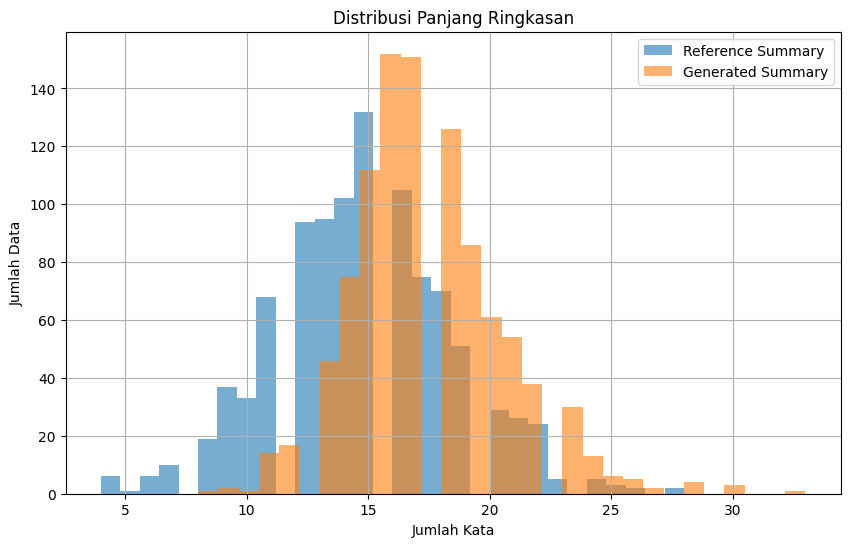

In [61]:
import matplotlib.pyplot as plt

# Hitung panjang tiap ringkasan
ref_lengths = [len(s.split()) for s in results["summary"]]
gen_lengths = [len(s.split()) for s in results["generated_summary"]]

plt.figure(figsize=(10, 6))
plt.hist(ref_lengths, bins=30, alpha=0.6, label="Reference Summary")
plt.hist(gen_lengths, bins=30, alpha=0.6, label="Generated Summary")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Panjang Ringkasan")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tqdm import tqdm

# Hitung ROUGE-1 per sampel
rouge_1_scores = []
for pred, ref in tqdm(zip(results["generated_summary"], results["summary"]), total=1000):
    score = rouge_metric.compute(predictions=[pred], references=[ref], use_stemmer=True)["rouge1"]
    rouge_1_scores.append(score * 100)

# Visualisasikan distribusi ROUGE-1
plt.figure(figsize=(10, 6))
plt.hist(rouge_1_scores, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribusi ROUGE-1 per Sampel")
plt.xlabel("Skor ROUGE-1 (%)")
plt.ylabel("Jumlah Data")
plt.grid(True)
plt.show()


 85%|████████▌ | 854/1000 [02:16<00:20,  7.09it/s]

In [ ]:
# import os
# os.environ["WANDB_DISABLED"] = "true"

# from transformers import Trainer, TrainingArguments

# training_args = TrainingArguments(
#     output_dir="/content/results",
#     num_train_epochs=3,
#     per_device_train_batch_size=8,
#     per_device_eval_batch_size=8,
#     # evaluation_strategy="epoch",
#     logging_dir="/content/logs",
#     save_total_limit=1,
#     logging_steps=500,
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=val_dataset,
#     tokenizer=tokenizer,
#     compute_metrics=compute_metrics
# )

# trainer.train()
